# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [86]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "/workspaces/clases_4geeks/notebooks/projects/assets/imdb_1000.csv"
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [87]:
# Copiamos el contenido de df_raw en nuestro nuevo dataFrame para trabajarlo sin cambiar el original
df = df_raw.copy()

In [88]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].str.len()
df[['title','title_length']].sample(3)

,title,title_length
312,Star Trek,9
884,Open Range,10
162,Gran Torino,11


In [89]:
# Calcula media, mediana y moda de la columna 'title_length'
print(f"La media de las longitudes: {df['title_length'].mean():.2f}")
print(f"La mediana de las longitudes: {df['title_length'].median()}")
print(f"La el valor que mas aparece es: {df['title_length'].mode()[0]}")


La media de las longitudes: 15.48
La mediana de las longitudes: 14.0
La el valor que mas aparece es: 12


In [90]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
print(f"El rango de variacion es de {rango}")

varianza = np.var(df['title_length'])
print(f"Varianza {varianza}")

des_std = np.std(df['title_length'])
print(f"Desviacion estandar {des_std}")


El rango de variacion es de 67
Varianza 72.03309541223715
Desviacion estandar 8.487231316055734


Asimetría: 1.5252523464631278
Kurtosis: 3.8122887061291544
La medida de forma indica que se habla de una gráfica con sesgo positivo y lepocúrtica


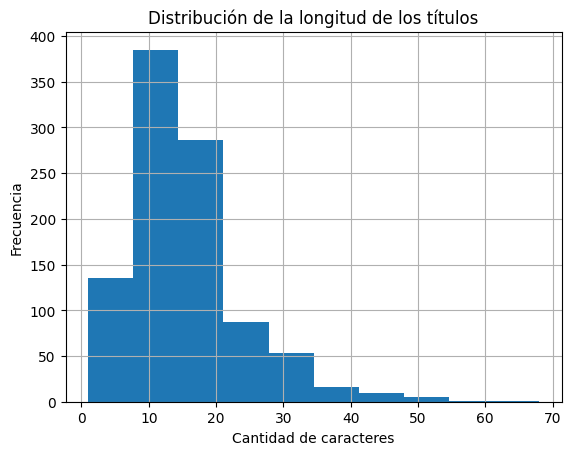

In [91]:
# Calcula asimetría y curtosis de la columna 'title_length'
print(f"Asimetría: {df['title_length'].skew()}")
print(f"Kurtosis: {df['title_length'].kurt()}")
print("La medida de forma indica que se habla de una gráfica con sesgo positivo y lepocúrtica")

#Gráfica
df['title_length'].hist()
plt.title("Distribución de la longitud de los títulos")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.show()

In [92]:
# Imprime el título más corto y el título más largo según su longitud
display(df.sort_values(by = "title_length", ascending=False)[['title','title_length']].head(1))
display(df.sort_values(by = "title_length", ascending=True)[['title','title_length']].head(1))

,title,title_length
48,Dr. Strangelove or: How I Learned to Stop Worr...,68


,title,title_length
63,M,1


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [110]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
#lista = [np.random.choice(df['title_length']) for i in range(5)]
lista = [10, 13, 14, 18, 22]

In [ ]:
# Calcula la media de los 5 valores
#media = np.mean(lista)
media = sum(lista) / len(lista)
print(f"Media: {media}")

Media: 15.4


In [121]:
# Calcula las diferencias al cuadrado con respecto a la media
#diferencias = np.sum((lista - media)**2)

diferencias = 0
for x in lista:
    diferencias += (x - media)**2
print(f"Suma diff: {diferencias}")

Suma diff: 87.19999999999999


In [123]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
des_std = np.std(lista)
varianza = (des_std)**2

print(f"Desviacion std: {des_std}")
print(f"Varianza: {varianza}")


Desviacion std: 4.176122603564219
Varianza: 17.439999999999994
